Ejemplo adaptado desde Kagle : Linear Regression Tutorial-for beginners -
JAGDISH MIRCHANDANI

# **MODELOS PREDICTIVOS -**

#  Regresión lineal simple

La regresión lineal simple es útil para encontrar relaciones entre dos variables continuas.

Uno es "predictor" o "variable independiente" y el otro es "respuesta" o variable "dependiente".

Busca una "relación estadística", pero no una "relación determinista".

Se dice que la relación entre dos variables es determinista si una variable puede expresarse con precisión por la otra.

Por ejemplo, usando la temperatura en grados Celsius es posible predecir con precisión Fahrenheit.

La relación estadística no es precisa para determinar la relación entre dos variables. Por ejemplo, relación entre altura y peso.

### Ejemplo: regresión lineal simple

Supongamos que tenemos un conjunto de datos que contiene información sobre la relación entre el "número de horas estudiadas" y las "calificaciones obtenidas".

Se ha observado a muchos estudiantes y se registran sus horas de estudio y calificaciones.

Nuestro objetivo es diseñar **un modelo que pueda predecir las calificaciones dada la cantidad de horas estudiadas**.

Utilizando los datos de entrenamiento, se obtiene una línea de regresión que dará un error mínimo.

Esta ecuación lineal luego se utiliza para cualquier dato nuevo. Es decir, si damos como entrada el número de horas estudiadas por un estudiante, nuestro modelo debería predecir su nota con un error mínimo.

**Y(pred) = b0 + b1*x**

**Los valores b0(intersección) y b1(pendiente) deben elegirse de manera que minimicen el error.**



# Regresión lineal múltiple

La regresión lineal múltiple es una técnica estadística para comprender la relación entre un dependiente
variable y varias variables independientes (variables explicativas).

El objetivo de la regresión múltiple es encontrar una ecuación lineal que pueda determinar mejor el valor de
variable dependiente Y para diferentes valores de variables independientes en X.

Considere otro ejemplo en el que necesitamos hacer predicciones de ventas utilizando el presupuesto de marketing televisivo.

En un escenario de la vida real, el director de marketing querría analizar la dependencia de las ventas del presupuesto asignado a diferentes
fuentes de mercadeo. Aquí, hemos considerado tres fuentes de marketing diferentes, es decir, marketing de televisión, marketing de radio.
marketing y marketing de periódicos.

El modelo de regresión lineal simple se construye sobre una línea recta que tiene la siguiente fórmula:
**Y(pred) = b0 + b1*x**

La regresión lineal múltiple también utiliza un modelo lineal que se puede formular de forma muy similar.

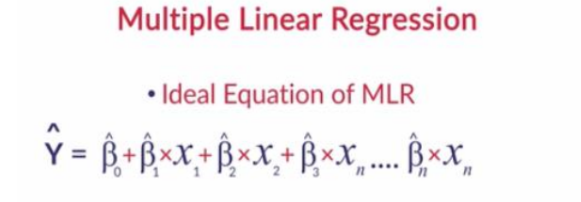

**¡Ahora intentaremos usaremos un METODO PREDICTIVO con la construcción de un modelo de regresión lineal y evaluaremos su rendimiento!**

In [ ]:
!pip install colorama

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor

# OBJETIVO : **El conjunto de datos que vamos a utilizar aquí tiene datos relacionados con algunos clientes que han optado por un seguro, necesitamos predecir la prima del seguro en función de las características dependientes. primero revisemos el conjunto de datos**

In [ ]:
train = pd.read_csv("insurance.csv")
train.head()

Entonces, se nos ha proporcionado edad, sexo, IMC, no. de niños, salario, región y gastos.

Aquí, los gastos son nuestra variable objetivo.

In [ ]:
train.shape

In [ ]:
train.isnull().sum()

In [ ]:
train.info()

### Let's check some statistics

In [ ]:
for col in train.columns:
    print(Fore.BLUE + "Feature Name:",col,Style.RESET_ALL)
    print(Fore.YELLOW + "",train[col].describe(),Style.RESET_ALL)
    print(Fore.RED + "-------------------------------------------------")
    print("-------------------------------------------------",Style.RESET_ALL)

Al observar los números anteriores, podemos decir que los datos están en buen estado y no requieren ningún procesamiento previo.
¡Seguiremos buscando valores atípicos dentro de un tiempo!

Ahora, ¡comprobemos cómo se distribuyen los datos numéricos!

In [ ]:
num_cols = ["age",'bmi','expenses','children']

plt.figure(figsize = (15,10))

for idx,col in enumerate(num_cols):
    plt.subplot(2,2,idx+1)
    sns.histplot(train[col])

¡Solo el IMC tiene una distribución normal!

# EDA

### Análisis Univariado, usaremos una rutina desarrollada especialmente para este análisis.

In [11]:
# helper function to perform univariate analysis
def univariate(feat):
    count = train[feat].value_counts()

    print("--------------------" + feat + " Distribution (counts)------------------")
    print(count)

    print("--------------------" + feat + " Distribution (in %)------------------")
    if feat == "region":
        val1 = count.values[0]
        val2 = count.values[1]
        val3 = count.values[2]
        val4 = count.values[3]
    else:
        val1 = count.values[0]
        val2 = count.values[1]


    if feat == "region":
        print("% of " + count.index[0] + ":", (val1/train.shape[0]) * 100)
        print("% of " + count.index[1] + ":", (val2/train.shape[0]) * 100)
        print("% of " + count.index[2] + ":", (val3/train.shape[0]) * 100)
        print("% of " + count.index[3] + ":", (val4/train.shape[0]) * 100)
    else:
        print("% of " + count.index[0] + ":", (val1/train.shape[0]) * 100)
        print("% of " + count.index[1] + ":", (val2/train.shape[0]) * 100)

    # lets visualize what we discussed above
    plt.figure(figsize = (8,6))
    if feat == "region":
        plt.bar(count.index, count.values,color = ['g','b','y','r'])
    else:
        plt.bar(count.index, count.values,color = ['g','b'])

    plt.show()

In [ ]:
univariate("sex")

Hay casi iguales no. de hombres y mujeres en los datos dados

In [ ]:
univariate("smoker")


¡Hay más no fumadores que fumadores!

In [ ]:
univariate("region")

¡Hay una buena cantidad de representación de las cuatro áreas geográficas!

### Análisis bivariado
#### Comprobemos cuántos fumadores son hombres/mujeres.

In [ ]:
#sns.countplot(train.sex,hue=train.smoker)
sns.countplot(x='sex', hue='smoker', data=train)
plt.show()

Casi igual no. de hombres/mujeres son fumadores/no fumadores!

### Ahora verifiquemos la relación de varias características con la variable objetivo.

In [ ]:
sns.pairplot(train)

La edad y el IMC parecen tener buena relación con la variable objetivo.
¡Comprobemos ahora la correlación entre variables!

In [ ]:
sns.pairplot(train,hue="smoker")

In [ ]:
sns.pairplot(train,hue="sex")

### Multicolinealidad

Puede ser que algunas variables tengan alguna relación entre sí;

En otras palabras, las variables pueden ser muy colineales entre sí. Una forma sencilla de detectar la colinealidad es observar la matriz de correlación de las variables independientes como se muestra.

In [ ]:
corrMatrix = train.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()

Un valor grande en esta matriz indicaría un par de variables altamente correlacionadas.

Desafortunadamente, no todos los problemas de colinealidad pueden detectarse mediante la inspección de la matriz de correlación. Es posible para
Existe colinealidad entre tres o más variables incluso si ningún par de variables tiene una correlación alta.

Esta situación se llama "multicolinealidad".

# Construyamos el modelo

In [27]:
# convertimos a dato categórico
train.sex = train.sex.astype("category")
# Después de convertir la columna "sex" en un tipo de datos categórico,
# estamos utilizando el atributo cat.codes para asignar códigos numéricos a cada categoría.
# El + 1 se añade para que los códigos resultantes comiencen desde 1 en lugar de 0.
train.sex = train.sex.cat.codes + 1

In [28]:
train.region = train.region.astype("category")
train.region = train.region.cat.codes + 1

In [29]:
train.smoker = train.smoker.astype("category")
train.smoker = train.smoker.cat.codes + 1

In [30]:
# escalamos las características numéricas
scale = ['age','bmi','children']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Aplicamos escalar a todas las columnas
train[scale] = scaler.fit_transform(train[scale])

In [ ]:
train.describe()

In [ ]:
X = train.drop('expenses',1)
y = train.expenses

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

In [ ]:
# importamos LinearRegression desde sklearn
from sklearn.linear_model import LinearRegression
# Creamos el objeto
lr = LinearRegression()
# No es necesario especificar un objeto para guardar el resultado porque 'lr' tomará los resultados del modelo ajustado.
lr.fit(X_train, y_train)

In [ ]:
# Imprimimos los coeficientes y el intercepto
print(lr.intercept_)
print(lr.coef_)

In [36]:
# Hacemos predicciones con el conjunto de datos de test
y_pred = lr.predict(X_test)

# Evaluación del modelo (visualización)

Hemos construido el modelo, ahora es el momento de evaluar su rendimiento ( a través de visualización).

### Visualizamo el dato real contra la predicción

In [ ]:
# Real contra predicción
plt.figure(figsize = (15,10))

c = [i for i in range(1,len(X_test.index)+1,1)] # generating index

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.suptitle('Real y Predicción', fontsize=20)
plt.xlabel('Index', fontsize=18)